In [1]:
import pandas as pd
import seaborn as sns 


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import metrics

import joblib

In [2]:
data = pd.read_csv('pizza_v2.csv')

In [3]:
data

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [4]:
data.rename({'price_rupiah':'price'},axis=1,inplace = True)

In [5]:
data['price'] = data['price'].str.replace('Rp','')
data['price'] = data['price'].str.replace(',','')

In [6]:
data['price'] = data['price'].astype('int32')

In [7]:
data['price'] = data['price'].apply(lambda x: x*0.015)

In [8]:
data['diameter'] = data['diameter'].str.replace(' inch','')

In [9]:
data['diameter'] = data['diameter'].astype(float)

In [10]:
data[data['size'] == 'jumbo']['diameter'].head()

0    22.0
1    20.0
4    18.0
5    18.5
6    16.0
Name: diameter, dtype: float64

In [11]:
data[(data['size'] == 'jumbo') & (data['diameter']<=16)].head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,1650.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,1650.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,1650.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,1650.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [12]:
data = data.drop(data.index[[6,11,16,80]])

In [13]:
cate = data.select_dtypes(include=['object']).columns
cate

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese',
       'extra_mushrooms'],
      dtype='object')

In [14]:
en = LabelEncoder()

In [15]:
for i in cate:
     data[i]  = en.fit_transform(data[i])

In [16]:
X = data.drop('price',axis=1)
y = data['price']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [18]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)
y_pred5 = xg.predict(X_test)

In [20]:
s1 = metrics.r2_score(y_test,y_pred1)
s2 = metrics.r2_score(y_test,y_pred2)
s3 = metrics.r2_score(y_test,y_pred3)
s4 = metrics.r2_score(y_test,y_pred4)
s5 = metrics.r2_score(y_test,y_pred5)

In [21]:
y = pd.Series(name='ACC',data=[s1,s2,s3,s4,s5])
x = pd.Series(name='model',data = ['LR','SVM','RF','GBR','XG'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model', ylabel='ACC'>

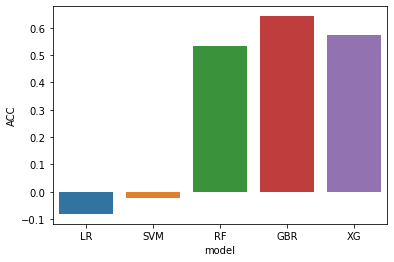

In [22]:
sns.barplot(x,y)

In [23]:
gbr.feature_importances_

array([6.41729992e-03, 6.60701674e-01, 4.42192781e-02, 1.28976100e-01,
       1.20277480e-01, 3.70338667e-02, 1.91854569e-03, 4.55755146e-04])

In [24]:
fea = pd.Series(gbr.feature_importances_,index=X_train.columns)

<AxesSubplot:>

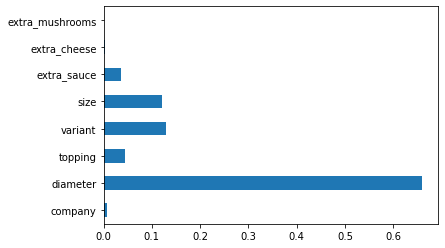

In [25]:
fea.plot(kind='barh')

In [26]:
X = data.drop('price',axis=1)
y = data['price']

In [27]:
rf = RandomForestRegressor()

In [28]:
rf.fit(X,y)

RandomForestRegressor()

In [29]:
joblib.dump(rf,'pizza_price')
model = joblib.load('pizza_price')
model.predict([[1,22.0,2,8,1,1,1,1]])

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3454.05])